# Setup

## Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
sns.set_theme()

## Config

In [4]:
class CFG:
    DATASET_PATH = '/kaggle/input/mcdonalds-india-menu-nutrition-facts/'
    DATASET_NAME = 'India_Menu.csv'

## Loading Dataset

In [5]:
df = pd.read_csv(CFG.DATASET_PATH + CFG.DATASET_NAME)
df.sample(5)

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
117,Beverages Menu,Large Coca-Cola,544 ml,217.36,0.00,0.00,0.00,0.00,0.00,54.34,54.34,54.34,41.99
33,Regular Menu,L1 Coffee with milk,205 ml,35.80,1.00,2.00,1.20,0.08,6.00,1.60,3.45,0.00,14.00
84,McCafe Menu,Chocolate Shake,259 ml,270.90,4.16,7.70,6.74,0.14,8.39,46.76,37.78,27.88,178.46
20,Regular Menu,4 piece Chicken McNuggets,64 g,169.68,10.03,9.54,4.45,0.06,24.66,10.50,0.32,0.00,313.25
45,Breakfast Menu,Espresso Machiato,76.5 ml,44.98,2.09,2.02,1.49,0.08,6.27,4.97,2.50,0.00,26.05


<hr>

# General Overview

## Some Preprocessing

The menu items mainly consists of Regular Eatery and Beverages. We can add one more column to classify those menu items using the unit in 'Per Serving Size'. If it is 'g' -> Snack. Else -> Beverage

In [6]:
def extractItemType(menu_item):
    last_character = menu_item[-1]
    if last_character == 'g':
        return 'Snack'
    else:
        return 'Beverage'

In [7]:
df['Food Category'] = np.vectorize(extractItemType)(df['Per Serve Size'])

<p>One more thing we can do is encode 'Per Serving Size' as number.</p>
<b>Note: </b> This encoding is good for all the items that are in grams, but maybe not the best of beverages. The reason is, conversion from millileter to gram depends on the density of the beverage. But for this encoding, we are going to assume that density of the beverages is almost equal to that of water, so: <code>1 g = 1 ml</code>

In [8]:
def serveSizeAsNum(menu_item):
    splitted_num = menu_item.split(' ')[0]
    return float(splitted_num)

In [9]:
df['Serve Size Number'] = np.vectorize(serveSizeAsNum)(df['Per Serve Size'])

In [10]:
df.sample(3)

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Food Category,Serve Size Number
13,Regular Menu,American Chicken Burger,165 g,446.95,20.29,22.94,7.28,0.15,47.63,38.54,7.48,4.76,1132.30,Snack,165.0
71,McCafe Menu,Moroccon Mint Green Tea (R),330 ml,7.39,0.40,0.33,0.33,0.33,3.30,3.30,1.65,0.00,17.69,Beverage,330.0
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58,Snack,199.0


## Options for Moving Forward

<p>With the extraction of Serve Size as numbers, we have two options to move on:</p>
<ol>
    <li>Convert all numeric columns to 'per grams' (by Dividing each column by 'Serve Size Number'. </li>
    <li>Move on as it is. </li>
</ol>
<p>Another Data Frame can be created to get the nutritional data per gram for each item.</p>
<p>However, the visualizaitons created will be for the original dataframe. </p>

In [11]:
df_numeric = df.select_dtypes(include=[np.number])
df_numeric_cols = list(df_numeric.columns)
serve_size_num = df_numeric_cols.pop() #No need to divide Serve Size Number by itself

In [12]:
df_avg = df.copy()
for col in df_numeric_cols:
    df_avg[col] = df_avg[col] / df[serve_size_num]
    
df_avg.sample(5)

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Food Category,Serve Size Number
1,Regular Menu,McAloo Tikki Burger®,146 g,2.325479,0.058219,0.077466,0.029247,0.001370,0.010068,0.344315,0.048288,0.027877,3.735205,Snack,146.0
56,McCafe Menu,Flat White (R),347.5 ml,0.620777,0.029813,0.034590,0.025439,0.001007,0.104978,0.054906,0.041468,0.000000,0.445986,Beverage,347.5
140,Condiments Menu,Mixed Fruit Beverage,180 ml,0.401389,0.003611,0.000111,0.000111,0.000111,0.000056,0.100000,0.093500,0.000000,0.060000,Beverage,180.0
45,Breakfast Menu,Espresso Machiato,76.5 ml,0.587974,0.027320,0.026405,0.019477,0.001046,0.081961,0.064967,0.032680,0.000000,0.340523,Beverage,76.5
120,Beverages Menu,Large Fanta Oragne,544 ml,0.472206,0.000000,0.000000,0.000000,0.000000,0.000000,0.118051,0.118051,0.118051,0.202500,Beverage,544.0


## Missing Values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             140 non-null    float64
 13  Food Category           141 non-null    object 
 14  Serve Size Number       141 non-null    fl

<p>So, one row has missing value of Sodium. We can deal with this in following ways:</p>
<ul>
    <li>We can simply ignore one single row.</li>
    <li>We can use imputation techniques like mean or median.</li>
    <li>Maybe we can see if Sodium is correlated with other variable.</li>
</ul>
<p>I am going for the last approach to find is there any correlation of sodium with other variables.</p>

## Data Imputation

One way to check correlation between different features would be to draw <b>correlation matrix</b>.

<AxesSubplot:>

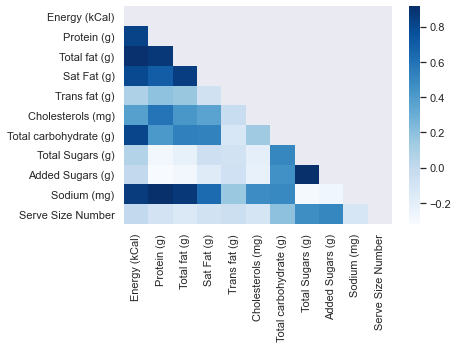

In [14]:
corr = df.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cmap='Blues', annot=False, mask=mask)

So the correlation matrix suggests that there is strong correlation between Proteins and Sodium. Lets see what kind of correlation there is?

<AxesSubplot:xlabel='Protein (g)', ylabel='Sodium (mg)'>

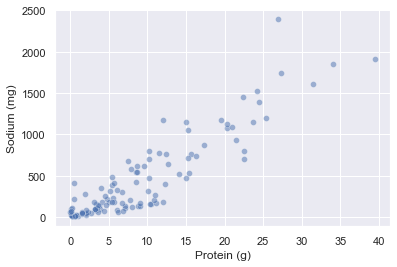

In [15]:
#Plotting scatterplot where both sodium and protein content have non-zero values
df_protein_sodium = pd.DataFrame(df['Protein (g)'])
df_protein_sodium['Sodium (mg)'] = df['Sodium (mg)']

df_protein_sodium_1 = df_protein_sodium.loc[(df_protein_sodium['Sodium (mg)'] > 1) & (df_protein_sodium['Protein (g)'])]
sns.scatterplot(data=df_protein_sodium_1, x='Protein (g)', y='Sodium (mg)', palette='green', alpha=0.5)

Hmm. Maybe we can use Proteins to use predict the missing value for Missing Sodium. Does not seem like a bad idea.

## Using Linear Regression for Data Imputation

In [16]:
df_protein_sodium_clean = df_protein_sodium.dropna()

X_train, y_train = df_protein_sodium_clean['Protein (g)'], df_protein_sodium_clean['Sodium (mg)']
X_train = X_train.to_numpy().reshape(-1, 1)

I am using <code>sklearn.pipeline.Pipeline</code> to keep my code organized or if there is additional manipulation I need, the pipeline can easily be modified. 

In [17]:
impute_pipe = Pipeline([
    ('stdscaler', StandardScaler()),
    ('ridge', Ridge()),
])

In [18]:
impute_pipe.fit(X_train, y_train)

Pipeline(steps=[('stdscaler', StandardScaler()), ('ridge', Ridge())])

Now, let's predict the missing value from our original dataset.

In [19]:
missing_sodium_row = df[df['Sodium (mg)'].isnull()]
missing_sodium_protein = missing_sodium_row['Protein (g)']
missing_sodium_protein_index = list(missing_sodium_row.index)[0]

In [20]:
#Prediction
sodium_val = impute_pipe.predict([missing_sodium_protein])
#Replacing the value in original dataframe
df.at[missing_sodium_protein_index, 'Sodium (mg)'] = sodium_val

In [21]:
df.isna().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               0
Food Category             0
Serve Size Number         0
dtype: int64

Yes, it was a little too much to just impute a single data point but for larger datasets, this imputation technique might be helpful somewhere.

## Dataframe Summary

In [22]:
df.describe()

,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Serve Size Number
count,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000,141.000000
mean,244.635461,7.493546,9.991702,4.997589,0.687163,26.350071,31.190284,15.464894,10.336950,368.836218,222.170213
std,185.554837,8.336863,10.339511,4.900451,6.326136,50.334200,20.602044,15.690202,14.283388,478.276177,124.661685
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,116.360000,0.650000,0.460000,0.280000,0.060000,1.510000,15.740000,2.330000,0.000000,44.530000,125.790000
50%,219.360000,4.790000,7.770000,4.270000,0.150000,8.390000,30.820000,9.160000,3.640000,153.150000,212.500000
75%,339.520000,10.880000,14.160000,7.280000,0.220000,31.110000,46.000000,26.950000,19.230000,545.340000,301.000000
max,834.360000,39.470000,45.180000,20.460000,75.260000,302.610000,93.840000,64.220000,64.220000,2399.490000,544.000000


<hr>

# Data Visualization

## Splitting Up Dataset

First, it is a good idea to split up dataset in numerical and categorical columns.

In [23]:
df_numeric = df.select_dtypes(include=[np.number])
df_categoric = df.select_dtypes(exclude=[np.number])

df_numeric_cols = list(df_numeric.columns)
df_categoric_cols = list(df_categoric.columns)

## Max and Min in each column

Lets see which menu items had maximum and minimum in the columns.

In [24]:
def maxAndMinStats(dataframe, cols):
    """Extracting out players with interesting statistics"""
    def maxAndMin(dataf, column):
        return dataf.loc[dataf[column].idxmax()], dataf.loc[dataf[column].idxmin()]
    
    maxMinList = []
    
    for col in cols:
        print('Column: ', col)
        res = maxAndMin(dataframe, col)
        max_, min_ = res
        print('Max in ', col, ': ', max_['Menu Items'])
        print('Min in ', col, ': ', min_['Menu Items'], '\n')
        
        maxMinList.append(res)
    
    return maxMinList

In [25]:
maxMinStats = maxAndMinStats(df, df_numeric_cols)

Column:  Energy (kCal)
Max in  Energy (kCal) :  Chicken Cheese Lava Burger
Min in  Energy (kCal) :  Vedica Natural Mineral Water 

Column:  Protein (g)
Max in  Protein (g) :  Chunky Chipotle American Burger Chicken
Min in  Protein (g) :  L1 Coffee 

Column:  Total fat (g)
Max in  Total fat (g) :  Chicken Cheese Lava Burger
Min in  Total fat (g) :  L1 Coffee 

Column:  Sat Fat (g)
Max in  Sat Fat (g) :  McSpicy Premium Veg Burger
Min in  Sat Fat (g) :  L1 Coffee 

Column:  Trans fat (g)
Max in  Trans fat (g) :  5 piece Chicken Strips
Min in  Trans fat (g) :  L1 Coffee 

Column:  Cholesterols (mg)
Max in  Cholesterols (mg) :  McSpicy Premium Chicken Burger
Min in  Cholesterols (mg) :  L1 Coffee 

Column:  Total carbohydrate (g)
Max in  Total carbohydrate (g) :  Veg Maharaja Mac
Min in  Total carbohydrate (g) :  Coke Zero Can 

Column:  Total Sugars (g)
Max in  Total Sugars (g) :  Large Fanta Oragne
Min in  Total Sugars (g) :  L1 Coffee 

Column:  Added Sugars (g)
Max in  Added Sugars (g)

## Histograms of Numeric Data

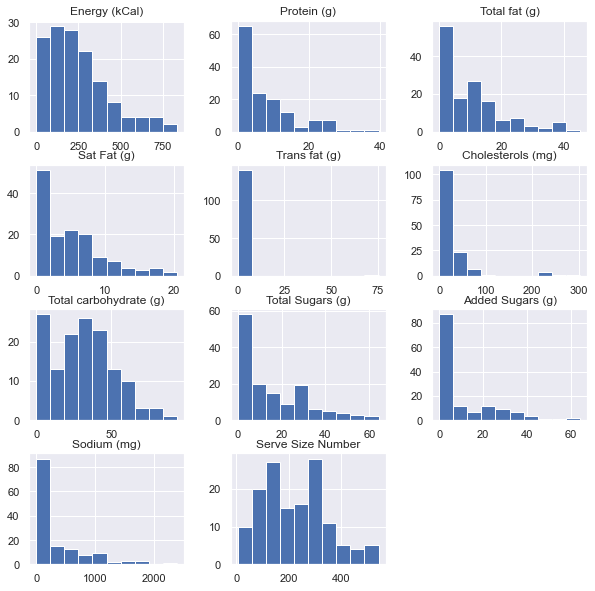

In [26]:
df.hist(figsize=(10,10));

## Categorical Data

In [27]:
df_categoric.sample(5)

,Menu Category,Menu Items,Per Serve Size,Food Category
32,Regular Menu,L1 Coffee,200 ml,Beverage
19,Regular Menu,McSpicy Fried Chicken 1 pc,115 g,Snack
64,McCafe Menu,Hot Chocolate (L),367 ml,Beverage
127,Beverages Menu,Coke Float,286.79 ml,Beverage
55,McCafe Menu,Flat White (S),266.5 ml,Beverage


<AxesSubplot:xlabel='Menu Category', ylabel='count'>

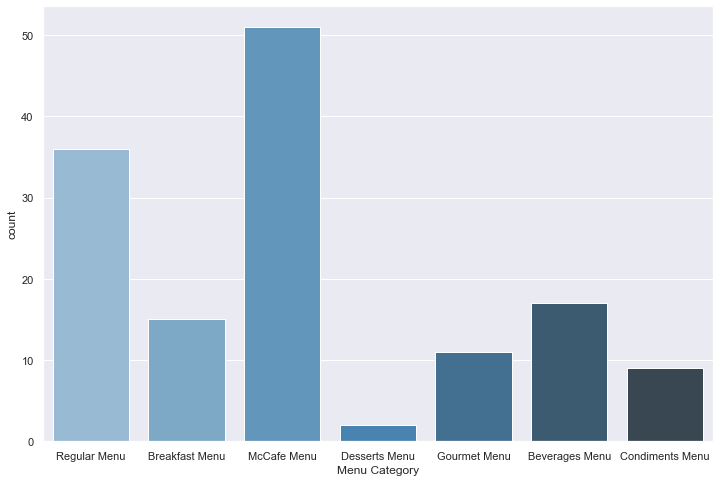

In [28]:
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x='Menu Category', data=df, palette="Blues_d")

<AxesSubplot:xlabel='Food Category', ylabel='count'>

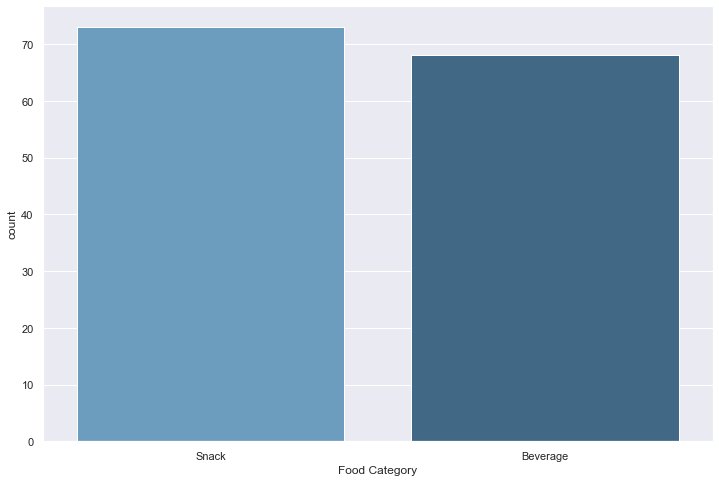

In [29]:
sns.countplot(x='Food Category', data=df_categoric, palette="Blues_d")

## Grouping Menu Items by Category

In [30]:
df_means = df.groupby('Menu Category').agg('mean')
df_means

,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Serve Size Number
Menu Category,,,,,,,,,,,
Beverages Menu,143.326471,0.268235,0.308824,0.225882,0.008824,0.829412,34.851765,34.677059,34.025882,37.604118,390.492353
Breakfast Menu,181.290000,7.636667,7.735333,4.354000,0.146000,61.010667,21.074000,4.358667,1.220000,360.378000,174.013333
Condiments Menu,47.473333,0.731111,3.876667,0.572222,0.067778,1.834444,8.287778,6.104444,1.691111,121.148889,37.444444
Desserts Menu,162.875000,2.815000,5.255000,3.160000,0.095000,6.400000,26.055000,19.920000,15.015000,115.815000,117.085000
Gourmet Menu,543.497273,21.684545,27.671818,11.987273,0.194545,73.210909,49.179091,8.799091,4.811818,1272.338796,217.363636
McCafe Menu,183.679608,4.295490,5.945686,4.558824,0.219804,12.861373,29.039412,22.615490,13.680980,103.371961,264.452157
Regular Menu,367.737778,12.990833,17.625833,7.213333,2.233333,35.987222,37.237778,5.019444,1.801667,704.758333,156.338889


In [31]:
df_means.style.background_gradient(cmap='Blues')

,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg),Serve Size Number
Menu Category,,,,,,,,,,,
Beverages Menu,143.326471,0.268235,0.308824,0.225882,0.008824,0.829412,34.851765,34.677059,34.025882,37.604118,390.492353
Breakfast Menu,181.290000,7.636667,7.735333,4.354000,0.146000,61.010667,21.074000,4.358667,1.220000,360.378000,174.013333
Condiments Menu,47.473333,0.731111,3.876667,0.572222,0.067778,1.834444,8.287778,6.104444,1.691111,121.148889,37.444444
Desserts Menu,162.875000,2.815000,5.255000,3.160000,0.095000,6.400000,26.055000,19.920000,15.015000,115.815000,117.085000
Gourmet Menu,543.497273,21.684545,27.671818,11.987273,0.194545,73.210909,49.179091,8.799091,4.811818,1272.338796,217.363636
McCafe Menu,183.679608,4.295490,5.945686,4.558824,0.219804,12.861373,29.039412,22.615490,13.680980,103.371961,264.452157
Regular Menu,367.737778,12.990833,17.625833,7.213333,2.233333,35.987222,37.237778,5.019444,1.801667,704.758333,156.338889


<p>So:</p>
<ul>
    <li>Gourmet menu has most protein, energy, fat and cholesterol content.</li>
    <li>Beverage Menu has lots of sugar.</li>
</ul>

<hr>

# Summary

<p>In this dataset we:</p>
<ul>
    <li>We did some preprocessing to extract out more information from dataset.</li>
    <li>We did data imputation.</li>
    <li>We visualized data in different forms.</li>
</ul>
<p>Hoping you enjoyed the notebook and learnt something new.</p>
<p>Goodbye!</p>

<hr>